In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/home/Jupyterhub/2021105061/.local/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
#declare header files

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings # To suppress some warnings
warnings.filterwarnings("ignore")


In [3]:
df = pd.read_csv('augmented_dataset1.csv') 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Age                   1100 non-null   int64 
 1   Gender                1100 non-null   int64 
 2   Air Pollution         1100 non-null   int64 
 3   Alcohol use           1100 non-null   int64 
 4   OccuPational Hazards  1100 non-null   int64 
 5   Genetic Risk          1100 non-null   int64 
 6   Balanced Diet         1100 non-null   int64 
 7   Obesity               1100 non-null   int64 
 8   Smoking               1100 non-null   int64 
 9   Passive Smoker        1100 non-null   int64 
 10  Shortness of Breath   1100 non-null   int64 
 11  Wheezing              1100 non-null   int64 
 12  Frequent Cold         1100 non-null   int64 
 13  Level                 1100 non-null   object
dtypes: int64(13), object(1)
memory usage: 120.4+ KB


In [4]:
df.head(10)

,Age,Gender,Air Pollution,Alcohol use,OccuPational Hazards,Genetic Risk,Balanced Diet,Obesity,Smoking,Passive Smoker,Shortness of Breath,Wheezing,Frequent Cold,Level
0,33,1,2,4,4,3,2,4,3,2,2,2,2,Low
1,17,1,3,1,3,4,2,2,2,4,7,8,1,Medium
2,35,1,4,5,5,5,6,7,2,3,9,2,6,High
3,37,1,7,7,7,6,7,7,7,7,3,1,6,High
4,46,1,6,8,7,7,7,7,8,7,4,1,4,High
5,35,1,4,5,5,5,6,7,2,3,9,2,6,High
6,52,2,2,4,4,3,2,4,3,2,2,2,2,Low
7,28,2,3,1,3,2,4,3,1,4,2,4,3,Low
8,35,2,4,5,5,6,5,5,6,6,3,2,2,Medium
9,46,1,2,3,2,4,3,3,2,3,4,6,2,Medium


In [5]:
df['Level'].unique() 

array(['Low', 'Medium', 'High'], dtype=object)

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1100.0,37.493636,12.585177,14.0,27.0,36.0,45.0,73.0
Gender,1100.0,1.416364,0.493180,1.0,1.0,1.0,2.0,2.0
Air Pollution,1100.0,3.901818,2.061695,1.0,2.0,3.0,6.0,8.0
Alcohol use,1100.0,4.563636,2.603026,1.0,2.0,5.0,7.0,8.0
OccuPational Hazards,1100.0,4.784545,2.116691,1.0,3.0,5.0,7.0,8.0
Genetic Risk,1100.0,4.549091,2.093438,1.0,3.0,5.0,7.0,7.0
Balanced Diet,1100.0,4.446364,2.137204,1.0,2.0,4.0,7.0,7.0
Obesity,1100.0,4.420000,2.135526,1.0,3.0,4.0,7.0,7.0
Smoking,1100.0,4.016364,2.481910,1.0,2.0,3.0,7.0,8.0
Passive Smoker,1100.0,4.229091,2.327247,1.0,2.0,4.0,7.0,8.0


In [7]:
# Convert the "Level" column to string type first
df["Level"] = df["Level"].astype(str)

# Map cancer levels from Objective(str) to numeric values
mapping = {'High': 2, 'Medium': 1, 'Low': 0}
df["Level"].replace(mapping, inplace=True)

# Display the unique cancer levels after mapping
print(df['Level'].unique())

[0 1 2]


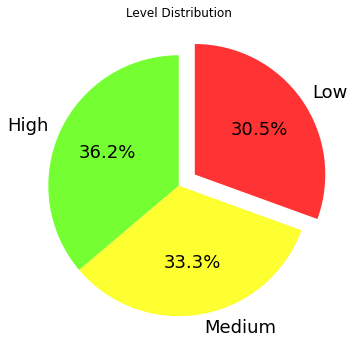

In [8]:
#check risk level
plt.figure(figsize=(10, 6))
explode = (0, 0, 0.15)
plt.pie(df['Level'].value_counts(), 
        labels=mapping.keys(), 
        explode=explode, autopct='%1.1f%%', 
        shadow=False, startangle=90, 
        colors=['#75ff33', '#fdff30', '#ff3333'],
        textprops={'fontsize': 18})
plt.title('Level Distribution')
plt.gca().set_facecolor('white')
plt.show()

In [9]:
#Each individual column(independent variables) influenced in target column(dependent variables) 
# function for bar plotting
def occ_cht(col, df=df):
    return df.groupby(col)['Level'].value_counts(normalize=True).unstack().plot(kind='bar', title = (f'Lungs Disease Based on {col}'), figsize=(12,5))

<AxesSubplot:title={'center':'Lungs Disease Based on Age'}, xlabel='Age'>

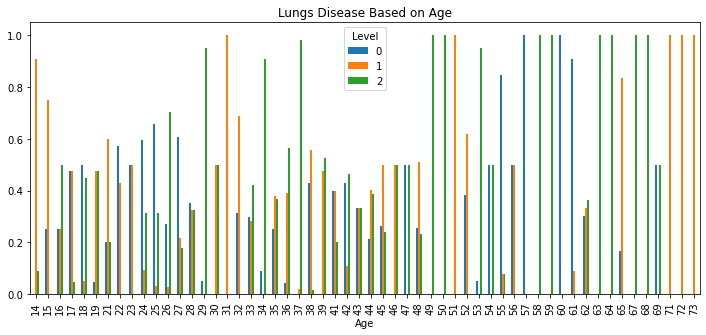

In [10]:
occ_cht('Age')

<AxesSubplot:title={'center':'Lungs Disease Based on Gender'}, xlabel='Gender'>

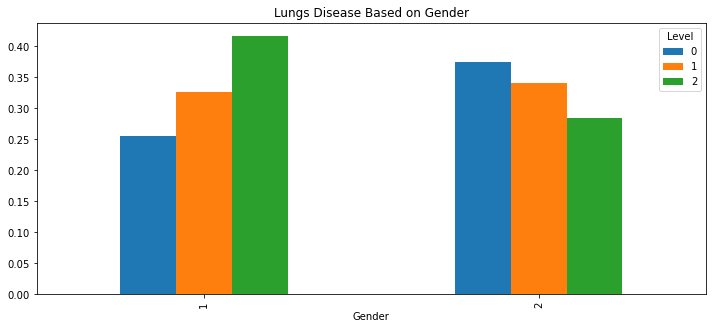

In [11]:
occ_cht('Gender')

<AxesSubplot:title={'center':'Lungs Disease Based on Air Pollution'}, xlabel='Air Pollution'>

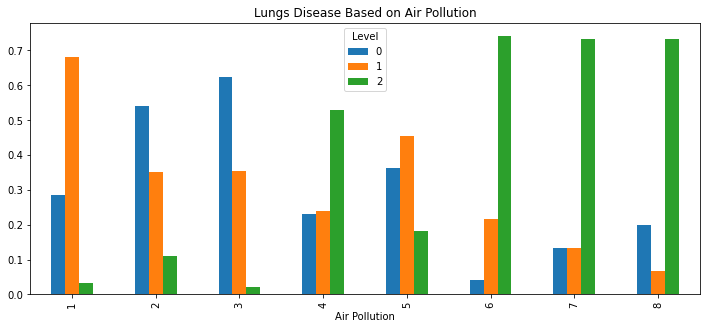

In [12]:
occ_cht('Air Pollution')

<AxesSubplot:title={'center':'Lungs Disease Based on Alcohol use'}, xlabel='Alcohol use'>

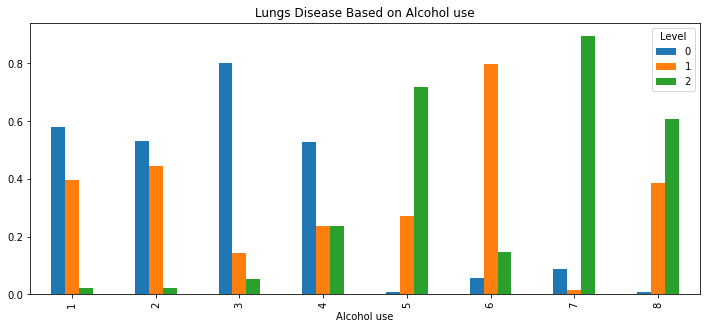

In [13]:
occ_cht('Alcohol use')

<AxesSubplot:title={'center':'Lungs Disease Based on OccuPational Hazards'}, xlabel='OccuPational Hazards'>

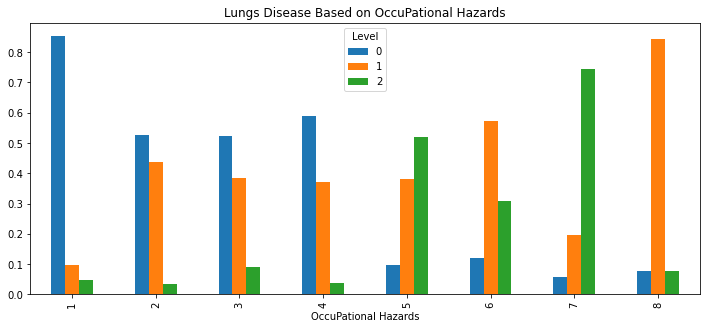

In [14]:
occ_cht('OccuPational Hazards')

<AxesSubplot:title={'center':'Lungs Disease Based on Genetic Risk'}, xlabel='Genetic Risk'>

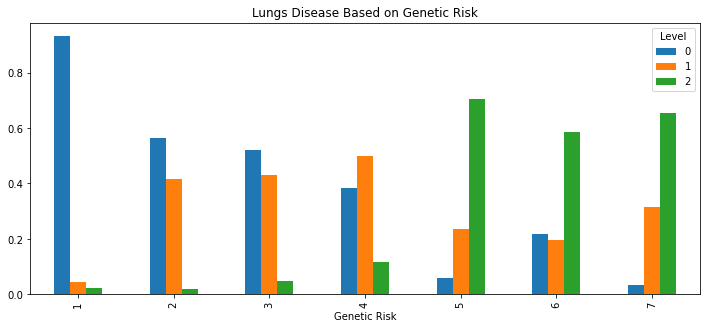

In [15]:
occ_cht('Genetic Risk')

<AxesSubplot:title={'center':'Lungs Disease Based on Balanced Diet'}, xlabel='Balanced Diet'>

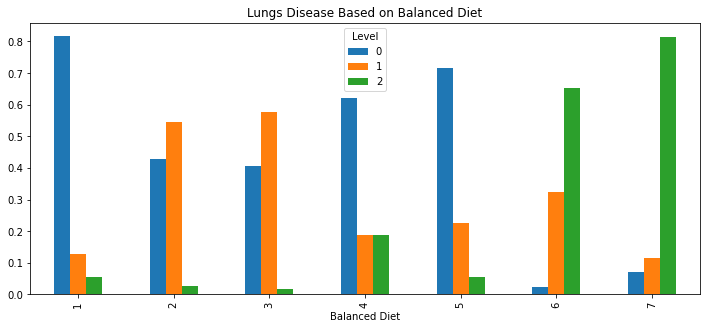

In [16]:
occ_cht('Balanced Diet')

<AxesSubplot:title={'center':'Lungs Disease Based on Obesity'}, xlabel='Obesity'>

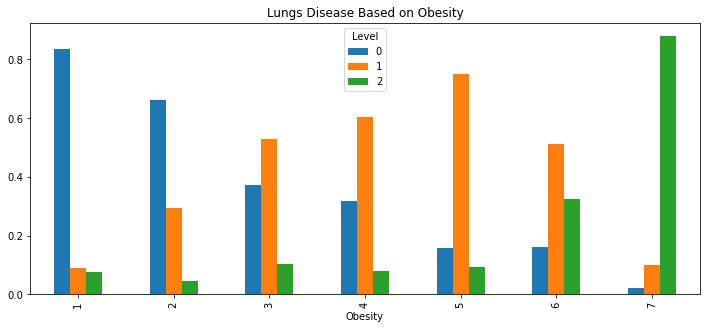

In [17]:
occ_cht('Obesity')

<AxesSubplot:title={'center':'Lungs Disease Based on Smoking'}, xlabel='Smoking'>

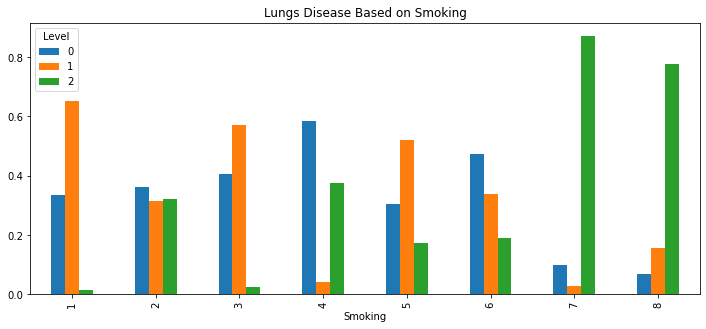

In [18]:
occ_cht('Smoking')

<AxesSubplot:title={'center':'Lungs Disease Based on Passive Smoker'}, xlabel='Passive Smoker'>

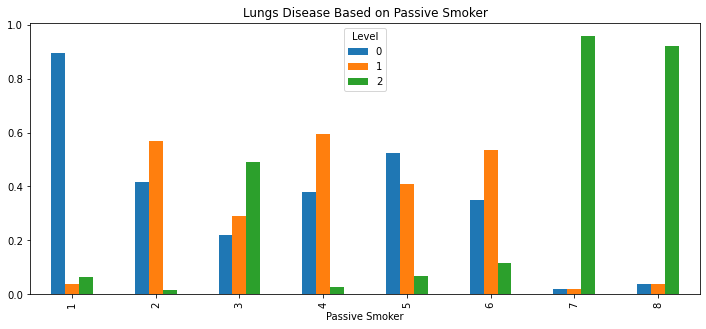

In [19]:
occ_cht('Passive Smoker')

<AxesSubplot:title={'center':'Lungs Disease Based on Shortness of Breath'}, xlabel='Shortness of Breath'>

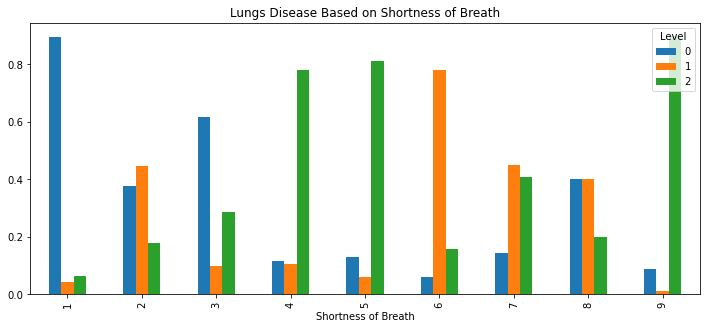

In [20]:
occ_cht('Shortness of Breath')

<AxesSubplot:title={'center':'Lungs Disease Based on Wheezing'}, xlabel='Wheezing'>

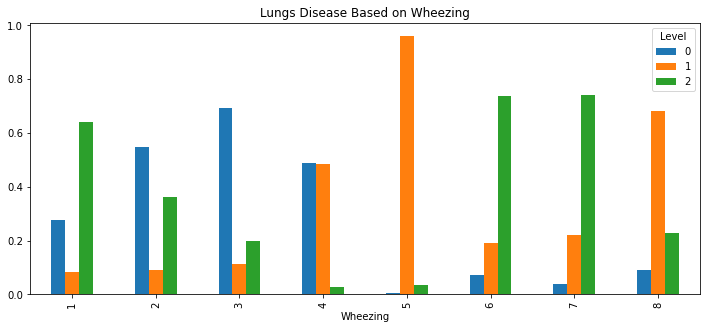

In [21]:
occ_cht('Wheezing')

<AxesSubplot:title={'center':'Lungs Disease Based on Frequent Cold'}, xlabel='Frequent Cold'>

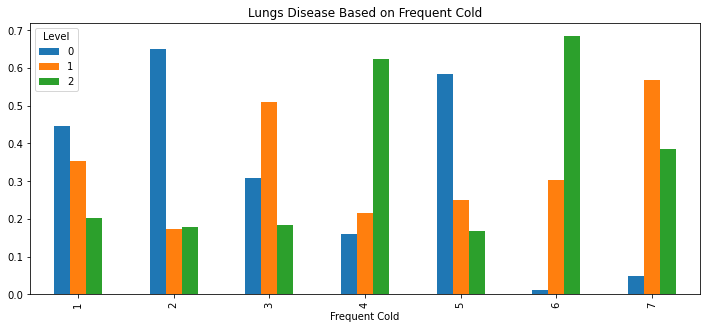

In [22]:
occ_cht('Frequent Cold')

In [23]:
#declaration of header files

from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve, RocCurveDisplay
from sklearn.metrics import r2_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn import metrics

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier 
from sklearn.svm import SVC 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.tree import DecisionTreeClassifier

In [25]:
#declare independent variables in 'x' & dependent variable in 'y'

X = df.drop('Level', axis=1) 
y = df['Level']

In [26]:
#spliting 80% datas as train data(X_train, y_train) & 20% datas as test data(X_test, y_test)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f'Shape of Independent variables - X Training: {X_train.shape} and X Testing {X_test.shape}')
print(f'Shape of dependent variable - Y Training: {y_train.shape} and Y Testing {y_test.shape}')

print(f'\nTraining output counts\n{y_train.value_counts()}')
print(f'\nTesting output counts\n{y_test.value_counts()}')

Shape of Independent variables - X Training: (880, 13) and X Testing (220, 13)
Shape of dependent variable - Y Training: (880,) and Y Testing (220,)

Training output counts
Level
2    304
1    290
0    286
Name: count, dtype: int64

Testing output counts
Level
2    94
1    76
0    50
Name: count, dtype: int64


In [27]:
#Data preprocesing 
scaler = StandardScaler()
X_train_stdscr = scaler.fit_transform(X_train)
X_test_stdscr = scaler.transform(X_test)

In [28]:
# Model Accuracies
mdl_accuracies = dict()
# Convert the target variable 'y' to integers

In [29]:
models = { 

    "Logistic Regression": (LogisticRegression(), { 
        'C': [0.01, 0.1, 1, 10], 
        'solver': ['lbfgs', 'liblinear'] 
    }), 

    "kNN":  (KNeighborsClassifier(), { 
        'n_neighbors': [3, 5, 7, 9], 
        'weights': ['uniform', 'distance'], 
        'metric': ['euclidean', 'manhattan'] 
    }), 

    
    "SVM": (SVC(probability=True), { 
        'C': [0.1, 1, 10], 
        'kernel': ['linear', 'rbf'], 
        'gamma': ['scale', 'auto'] 
    }),

     "Decision Tree": (DecisionTreeClassifier(), { 
        'max_depth': [None, 10, 20, 30], 
        'min_samples_split': [2, 5, 10] 
    }), 

    "Random Forest": (RandomForestClassifier(), { 
        'n_estimators': [100, 200, 300], 
        'max_depth': [None, 10, 20, 30], 
        'min_samples_split': [2, 5, 10] 
    }), 

 
     "XGBoost":(XGBClassifier(use_label_encoder=False, eval_metric='logloss'), { 
        'n_estimators': [100, 200, 300], 
        'learning_rate': [0.01, 0.1, 0.2], 
        'max_depth': [3, 6, 9] 
    })
}

In [30]:
#Function to evaluate the model
def evaluate_model_1(name, model, param_grid, X_train, X_test, y_train, y_test): 
    mdl = model.fit(X_train, y_train)
    y_pred  = mdl.predict(X_test)
    y_prob = mdl.predict_proba(X_test)[:, 1]
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred,  average='micro')
    f1 = f1_score(y_test, y_pred, average='micro')
    recall = recall_score(y_test, y_pred, average='micro')
    
    roc_scr = roc_auc_score(y_test, mdl.predict_proba(X_test), multi_class='ovr')
    fpr, tpr, thresholds = roc_curve(y_test, y_prob, pos_label=2)
    auc = metrics.auc(fpr, tpr)
    r2 = r2_score(y_test, y_pred)
    
    mdl_accuracies[name] = accuracy_score(y_test, y_pred)

    print(f"\nModel Name : {name}\n")
    print(f"\t Accuracy : {accuracy}\t ROC_AUC_Score : {roc_scr}\t AUC: {auc}\t  R2_Score : {r2}\n")
    print(f"\t Precision : {precision}\t F1 Score : {f1}\t Recall: {recall}\n")

    
    print(classification_report(y_test, y_pred))
    
    disp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred))
    disp.plot()
    plt.show()
    print("__________________________________________________________________")


Model Name : Logistic Regression

	 Accuracy : 0.9272727272727272	 ROC_AUC_Score : 0.9731694796806366	 AUC: 0.19731509625126648	  R2_Score : 0.8150887573964497

	 Precision : 0.9272727272727272	 F1 Score : 0.9272727272727272	 Recall: 0.9272727272727272

              precision    recall  f1-score   support

           0       0.87      0.94      0.90        50
           1       0.93      0.89      0.91        76
           2       0.96      0.95      0.95        94

    accuracy                           0.93       220
   macro avg       0.92      0.93      0.92       220
weighted avg       0.93      0.93      0.93       220



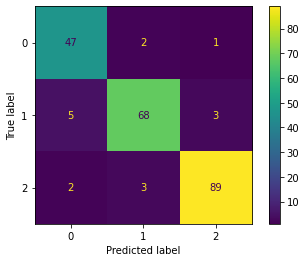

__________________________________________________________________

Model Name : kNN

	 Accuracy : 0.9454545454545454	 ROC_AUC_Score : 0.9711710661806094	 AUC: 0.19896149949341438	  R2_Score : 0.8224852071005917

	 Precision : 0.9454545454545454	 F1 Score : 0.9454545454545454	 Recall: 0.9454545454545454

              precision    recall  f1-score   support

           0       0.94      0.90      0.92        50
           1       0.91      0.99      0.95        76
           2       0.98      0.94      0.96        94

    accuracy                           0.95       220
   macro avg       0.94      0.94      0.94       220
weighted avg       0.95      0.95      0.95       220



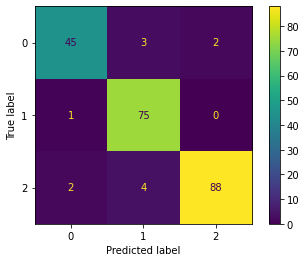

__________________________________________________________________

Model Name : SVM

	 Accuracy : 0.9363636363636364	 ROC_AUC_Score : 0.9855463843432112	 AUC: 0.16818642350557245	  R2_Score : 0.8964497041420119

	 Precision : 0.9363636363636364	 F1 Score : 0.9363636363636364	 Recall: 0.9363636363636364

              precision    recall  f1-score   support

           0       0.92      0.96      0.94        50
           1       0.91      0.91      0.91        76
           2       0.97      0.95      0.96        94

    accuracy                           0.94       220
   macro avg       0.93      0.94      0.94       220
weighted avg       0.94      0.94      0.94       220



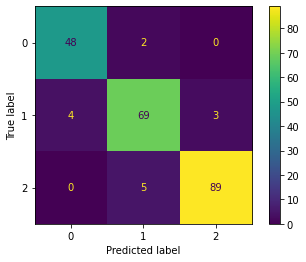

__________________________________________________________________

Model Name : Decision Tree

	 Accuracy : 0.9590909090909091	 ROC_AUC_Score : 0.970285744259132	 AUC: 0.21437014522120906	  R2_Score : 0.8446745562130178

	 Precision : 0.9590909090909091	 F1 Score : 0.9590909090909091	 Recall: 0.9590909090909091

              precision    recall  f1-score   support

           0       0.94      0.96      0.95        50
           1       0.95      0.99      0.97        76
           2       0.98      0.94      0.96        94

    accuracy                           0.96       220
   macro avg       0.96      0.96      0.96       220
weighted avg       0.96      0.96      0.96       220



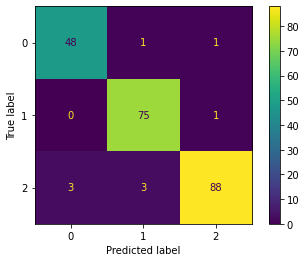

__________________________________________________________________

Model Name : Random Forest

	 Accuracy : 0.9454545454545454	 ROC_AUC_Score : 0.9976881625519437	 AUC: 0.18887200270178992	  R2_Score : 0.8224852071005917

	 Precision : 0.9454545454545454	 F1 Score : 0.9454545454545454	 Recall: 0.9454545454545454

              precision    recall  f1-score   support

           0       0.88      0.98      0.92        50
           1       0.96      0.93      0.95        76
           2       0.98      0.94      0.96        94

    accuracy                           0.95       220
   macro avg       0.94      0.95      0.94       220
weighted avg       0.95      0.95      0.95       220



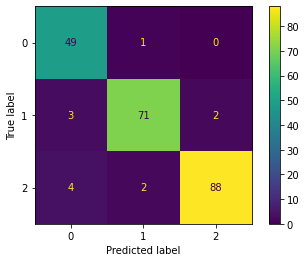

__________________________________________________________________

Model Name : XGBoost

	 Accuracy : 0.9636363636363636	 ROC_AUC_Score : 0.9981838863080382	 AUC: 0.1388044579533941	  R2_Score : 0.8742603550295858

	 Precision : 0.9636363636363636	 F1 Score : 0.9636363636363636	 Recall: 0.9636363636363636

              precision    recall  f1-score   support

           0       0.91      0.98      0.94        50
           1       0.97      0.96      0.97        76
           2       0.99      0.96      0.97        94

    accuracy                           0.96       220
   macro avg       0.96      0.97      0.96       220
weighted avg       0.97      0.96      0.96       220



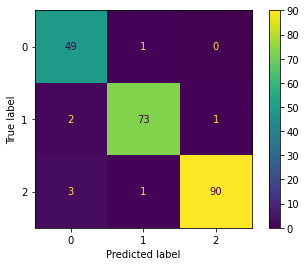

__________________________________________________________________


In [31]:
for name, (model, param_grid) in models.items(): 
    evaluate_model_1(name, model, param_grid, X_train, X_test, y_train, y_test) 
